## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import pylab
import math
pylab.rcParams['figure.figsize'] = (8.25, 6)
from sklearn.metrics import roc_curve, auc, confusion_matrix

Importing and formatting the training data

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/tornadoesr/data/raw/tor_train_set.csv")

In [3]:
# Seperating variables
# The outcomes
tornado_outcome = tor_df.iloc[:, [2]]


# Make sure variable is right
list(tornado_outcome)

['DAMAGE_PROPERTY']

In [4]:
# The predictors
tornado_predictors = tor_df.iloc[:, 3:]


# Make sure the variables are right
list(tornado_predictors)

['DURATION_SECONDS',
 'BEGIN_LAT',
 'BEGIN_LON',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'YEAR',
 'MULTI_VORT_IND',
 'OPEN_WATER_PROP',
 'DEV_OPEN_PROP',
 'DEV_LOW_PROP',
 'DEV_MED_PROP',
 'DEV_HIGH_PROP',
 'BARREN_LAND_PROP',
 'DECID_FOREST_PROP',
 'EVERGR_FOREST_PROP',
 'MIXED_FOREST_PROP',
 'SHRUB_SCRUB_PROP',
 'GRASS_LAND_PROP',
 'PASTURE_HAY_PROP',
 'CULT_CROPS_PROP',
 'WOOD_WETLAND_PROP',
 'HERB_WETLAND_PROP',
 'PERC_MOB_HOMES',
 'POP_DENS',
 'MEDIAN_HOUSE_INC',
 'MED_HOME_AGE',
 'NUM_HOMES',
 'PERC_WHITE',
 'PERC_MALE',
 'PERC_KIDS',
 'PERC_HIGH_SCHOOL',
 'PERC_ASSOC',
 'PERC_BACH',
 'PERC_GRAD',
 'PERC_SENIOR',
 'LOWERQ_HOME_VAL',
 'MED_HOME_VAL',
 'UPPERQ_HOME_VAL',
 'PERC_POVERTY',
 'GINI_INDEX',
 'PERC_NOT_WORKING',
 'PERC_COMM_30',
 'PERC_COMM_EARLY',
 'TOR_AREA',
 'TOT_DEV_INT',
 'TOT_WOOD_AREA',
 'WOOD_DEV_INT',
 'EXP_INC_AREA',
 'TIME_SPLINE_1',
 'TIME_SPLINE_2',
 'TIME_SPLINE_3',
 'TIME_SPLINE_4',
 'TIME_SPLINE_5',
 'TIME_SPLINE_6',
 'TIME_SPLINE_7',
 'TIME_SPLINE_8',
 'JULIAN_SP

In [5]:
# Make the outcomes into a numpy array
outcome_array = tornado_outcome.values

# Makes that numpy array into a torch Tensor
outcome_Tensor = torch.from_numpy(outcome_array)


# Make the predictors into a numpy array
predictors_array = tornado_predictors.values

# Make that numpy array into a torch Tensor
predictors_Tensor = torch.from_numpy(predictors_array)


# Convert those DoubleTensors to FloatTensors
# Changing outcomes from a DoubleTensor to a FloatTensor
outcome_Tensor = outcome_Tensor.float()

# Changing predictors too
predictors_Tensor = predictors_Tensor.float()

Now the cross-validation data

In [6]:
# Import cross-validation data
cv_df = pd.read_csv("/home/jeremy/tornadoesr/data/raw/tor_cv_set.csv")


# Get the outcomes
cv_outcome = cv_df.iloc[:, [2]]

# Convert the pandas column to a ndarray and then into a FloatTensor
cv_outcome_Tensor = torch.from_numpy(cv_outcome.values).float()


# Make sure the variable is right
list(cv_outcome)

['DAMAGE_PROPERTY']

In [7]:
# Get the validation set predictors
cv_predictors = cv_df.iloc[:, 3:]

# Make the validation set predictors into a numpy array
cv_predictors_Tensor = torch.from_numpy(cv_predictors.values).float()


# Make sure the variables are right
list(cv_predictors)

['DURATION_SECONDS',
 'BEGIN_LAT',
 'BEGIN_LON',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'YEAR',
 'MULTI_VORT_IND',
 'OPEN_WATER_PROP',
 'DEV_OPEN_PROP',
 'DEV_LOW_PROP',
 'DEV_MED_PROP',
 'DEV_HIGH_PROP',
 'BARREN_LAND_PROP',
 'DECID_FOREST_PROP',
 'EVERGR_FOREST_PROP',
 'MIXED_FOREST_PROP',
 'SHRUB_SCRUB_PROP',
 'GRASS_LAND_PROP',
 'PASTURE_HAY_PROP',
 'CULT_CROPS_PROP',
 'WOOD_WETLAND_PROP',
 'HERB_WETLAND_PROP',
 'PERC_MOB_HOMES',
 'POP_DENS',
 'MEDIAN_HOUSE_INC',
 'MED_HOME_AGE',
 'NUM_HOMES',
 'PERC_WHITE',
 'PERC_MALE',
 'PERC_KIDS',
 'PERC_HIGH_SCHOOL',
 'PERC_ASSOC',
 'PERC_BACH',
 'PERC_GRAD',
 'PERC_SENIOR',
 'LOWERQ_HOME_VAL',
 'MED_HOME_VAL',
 'UPPERQ_HOME_VAL',
 'PERC_POVERTY',
 'GINI_INDEX',
 'PERC_NOT_WORKING',
 'PERC_COMM_30',
 'PERC_COMM_EARLY',
 'TOR_AREA',
 'TOT_DEV_INT',
 'TOT_WOOD_AREA',
 'WOOD_DEV_INT',
 'EXP_INC_AREA',
 'TIME_SPLINE_1',
 'TIME_SPLINE_2',
 'TIME_SPLINE_3',
 'TIME_SPLINE_4',
 'TIME_SPLINE_5',
 'TIME_SPLINE_6',
 'TIME_SPLINE_7',
 'TIME_SPLINE_8',
 'JULIAN_SP

Now the test set data

In [8]:
# Import the test set data
test_df = pd.read_csv("/home/jeremy/tornadoesr/data/raw/tor_test_set.csv")


# Get the outcomes
test_outcome = test_df.iloc[:, [2]]

# Convert the pandas column to a ndarray and then into a FloatTensor
test_outcome_Tensor = torch.from_numpy(test_outcome.values).float()


# Make sure the variable is right
list(test_outcome)

['DAMAGE_PROPERTY']

In [9]:
# Get the test set predictors
test_predictors = test_df.iloc[:, 3:]

# Make the test set predictors into a numpy array
test_predictors_Tensor = torch.from_numpy(test_predictors.values).float()


# Make sure the variables are right
list(test_predictors)

['DURATION_SECONDS',
 'BEGIN_LAT',
 'BEGIN_LON',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'YEAR',
 'MULTI_VORT_IND',
 'OPEN_WATER_PROP',
 'DEV_OPEN_PROP',
 'DEV_LOW_PROP',
 'DEV_MED_PROP',
 'DEV_HIGH_PROP',
 'BARREN_LAND_PROP',
 'DECID_FOREST_PROP',
 'EVERGR_FOREST_PROP',
 'MIXED_FOREST_PROP',
 'SHRUB_SCRUB_PROP',
 'GRASS_LAND_PROP',
 'PASTURE_HAY_PROP',
 'CULT_CROPS_PROP',
 'WOOD_WETLAND_PROP',
 'HERB_WETLAND_PROP',
 'PERC_MOB_HOMES',
 'POP_DENS',
 'MEDIAN_HOUSE_INC',
 'MED_HOME_AGE',
 'NUM_HOMES',
 'PERC_WHITE',
 'PERC_MALE',
 'PERC_KIDS',
 'PERC_HIGH_SCHOOL',
 'PERC_ASSOC',
 'PERC_BACH',
 'PERC_GRAD',
 'PERC_SENIOR',
 'LOWERQ_HOME_VAL',
 'MED_HOME_VAL',
 'UPPERQ_HOME_VAL',
 'PERC_POVERTY',
 'GINI_INDEX',
 'PERC_NOT_WORKING',
 'PERC_COMM_30',
 'PERC_COMM_EARLY',
 'TOR_AREA',
 'TOT_DEV_INT',
 'TOT_WOOD_AREA',
 'WOOD_DEV_INT',
 'EXP_INC_AREA',
 'TIME_SPLINE_1',
 'TIME_SPLINE_2',
 'TIME_SPLINE_3',
 'TIME_SPLINE_4',
 'TIME_SPLINE_5',
 'TIME_SPLINE_6',
 'TIME_SPLINE_7',
 'TIME_SPLINE_8',
 'JULIAN_SP

## Convert property damage to binary variable: no damage or damage

In [10]:
def convert_prop_dam_to_binary(property_damage_values):
    
    # This function will convert continuous property damage values to binary values defining whether
        # or not a tornado caused any damage
    # property_damage_values = a PyTorch Tensor containing property damage values
    # Returns as PyTorch Tensor of binary values
    
    
    # Get the Tensor as a ndarray 
    prop_dam_array = property_damage_values.numpy()
    
    # For-loop to convert to binary
    for i in list(range(len(prop_dam_array))):
        
        if (prop_dam_array[i] == prop_dam_array.min())[0]:
            
            prop_dam_array[i] = 0
            
        else:
            
            prop_dam_array[i] = 1
     
    # Convert ndarray to Tensor
    prop_dam_Tensor = torch.from_numpy(prop_dam_array)
    
    # Return Tensor
    return(prop_dam_Tensor)

In [11]:
# Convert the training data
outcome_Tensor_binary = convert_prop_dam_to_binary(outcome_Tensor)

# And the cv data
cv_outcome_Tensor_binary = convert_prop_dam_to_binary(cv_outcome_Tensor)

# And the test data
test_outcome_Tensor_binary = convert_prop_dam_to_binary(test_outcome_Tensor)

## 1. Two hidden layers, 10 neurons each

Define the model architecture

In [12]:
number_input = tornado_predictors.shape[1]

In [13]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 10)
        self.fc2 = torch.nn.Linear(10, 10)
        self.fc3 = torch.nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

Define the loss function

In [14]:
loss_fn = torch.nn.BCELoss(reduction = 'mean')

Defining a function to setup and train the models. It will also produce a loss versus iteration plot

In [15]:
def train_neural_net(model, train_outcomes, train_inputs,
                     cv_outcomes, cv_inputs):
    
    # This function will train the neural network and produce a loss versus iteration plot
    # model = the model architecture, a Net class
    # train_outcomes = the right answers, PyTorch Tensor
    # train_inputs = what we're using to get to the right answers, PyTorch Tensor
    # cv_outcomes = the right answers of the new data, PyTorch Tensor
    # cv_inputs = what we're using to get the new right answers, PyTorch Tensor
    # Returns a plot and a trained Net
    
    
    # Make the outcomes into a Torch Variable
    outcome_Variable = Variable(train_outcomes)
    
    # Make the cv outcomes into a Torch Variable
    cv_outcome_Variable = Variable(cv_outcomes,
                                   requires_grad = False)
    
    # Make the predictors into a Torch Variable
    predictors_Variable = Variable(train_inputs,
                                   requires_grad = False)
    
    # Make the cv predictors into a Torch Variable
    cv_predictors_Variable = Variable(cv_inputs,
                                      requires_grad = False)
    
    
    # Make an empty list to add to for each iteration
    current_loss_value_mini = []
    
    # For the cv too
    current_cv_loss_value = []
    
    
    # Set the optimizer
    optimizer = torch.optim.Adagrad(model.parameters(), lr = 1e-2)
    
    
    # Train the neural network
    for t in range(20000):
        
        # Get the current mini-batch indices
        indices = torch.randperm(len(predictors_Tensor))[0:50]
        
        # Get the current mini-batches
        predictors_mini = predictors_Variable[indices]
        outcome_mini = outcome_Variable[indices]
        
        # Get the current predictions
        current_pred_mini = model(predictors_mini)
        cv_pred = model(cv_predictors_Variable)
        
        # Compute current losses and and append that to the empty list
        current_loss_mini = loss_fn(current_pred_mini, outcome_mini)
        current_loss_value_mini.append(current_loss_mini.item())
        
        current_cv_loss = loss_fn(cv_pred, cv_outcome_Variable)
        current_cv_loss_value.append(current_cv_loss.item())
        
        # Zero the gradients before backwards pass
        optimizer.zero_grad()
        
        # Backwards pass
        current_loss_mini.backward()
        
        # Update model parameters
        optimizer.step()
    
    
    # Get iterations as a list for x-axis of plot
    iterations = list(range(0, 20000))
    
    
    # Plot loss versus iteration
    plt.plot(iterations, current_loss_value_mini)
    plt.plot(iterations, current_cv_loss_value, "r-")
    plt.xlabel("Iteration", size = 14)
    plt.ylabel("Loss Value", size = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("How'd the Optimizing Go?", size = 16)

Train the first model.

The plot will display how well it optimized. The blue line is the mini batch values that the model was optimized on, while the red line is new (cross-validation) data.

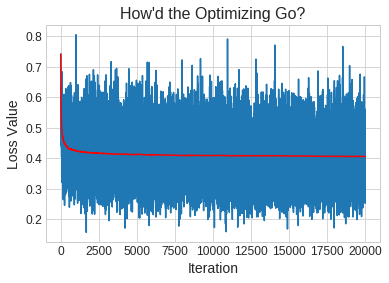

In [16]:
train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

How'd the model perform on the data used to make it?

In [17]:
def plot_perf(train_predictors, train_obs, model, alpha_val):
    
    # Plots how well the model performs on training data
    # train_predictors = the values that the model predicts from, PyTorch Tensor
    # train_obs = what the model would ideally predict, PyTorch Tensor
    # Returns a plot
    
    
    # Get the predictions
    train_predictions = model(Variable(train_predictors, requires_grad = False))
    
    # Convert that to a numpy array
    train_predictions = train_predictions.data.numpy()
    
    # Put it in log-transformed scale and convert it to a list
    train_predictions = train_predictions.tolist()
    
    
    # Put the observed outcomes in log-transformed scale
    # and convert it to a list
    train_obs = train_obs.numpy().tolist()
    
    
    # Plot it
    plt.scatter(train_obs, train_predictions, alpha = alpha_val, facecolor = 'k', marker = '.')
    axes = plt.gca()
    plt.xticks([0, 1], ['\nNon-damaging', '\nDamaging'], fontsize = 12)
    plt.xlim(-0.05, 1.05)
    plt.ylim(0, 1)
    axes.grid(False)
    axes.set_xlabel('True Outcome', size = 14)
    axes.set_ylabel('Predicted Probability of Damage', size = 14)
    plt.axhline(y = 0.5, color = 'r', linestyle = '--');

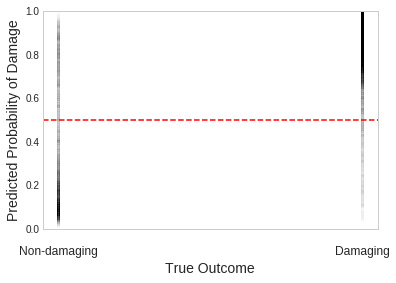

In [18]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

### 1.1 Accuracy, Confusion Matrix

In [19]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
'Training set accuracy is: ' + str(train_accuracy)

'Training set accuracy is: 0.8259752041124887'

In [20]:
cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

'Cross-validation set accuracy is: 0.8213151927437642'

In [21]:
confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred)

array([[ 835,  539],
       [ 249, 2787]])

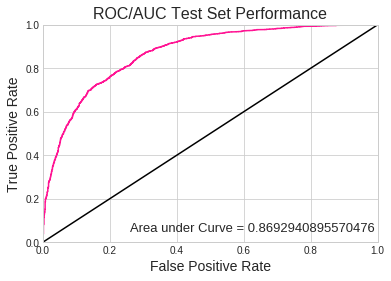

In [22]:
# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 2. Two hidden layers, 20 neurons each

In [23]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 20)
        self.fc2 = torch.nn.Linear(20, 20)
        self.fc3 = torch.nn.Linear(20, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

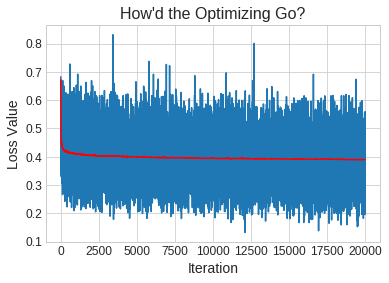

In [24]:
train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

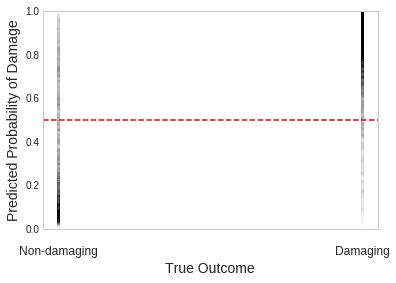

In [25]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [26]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8355004535833082


'Cross-validation set accuracy is: 0.8267573696145125'

[[ 860  514]
 [ 250 2786]]


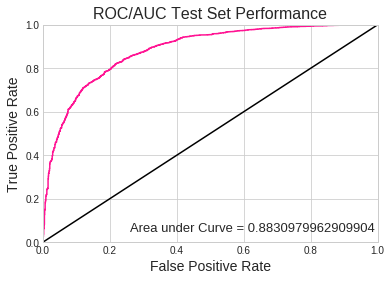

In [27]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 3. Two hidden layers, 30 neurons each

In [28]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 30)
        self.fc2 = torch.nn.Linear(30, 30)
        self.fc3 = torch.nn.Linear(30, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

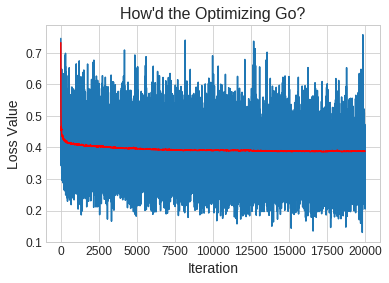

In [29]:
train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

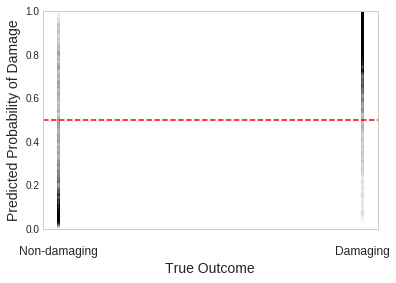

In [30]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [31]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8475960084668884


'Cross-validation set accuracy is: 0.828798185941043'

[[ 888  486]
 [ 269 2767]]


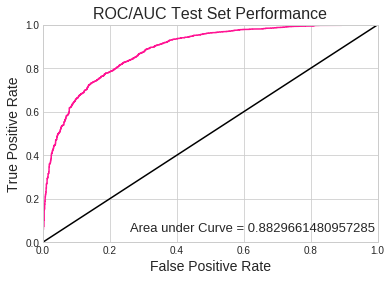

In [32]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 4. Two hidden layers, 40 neurons each

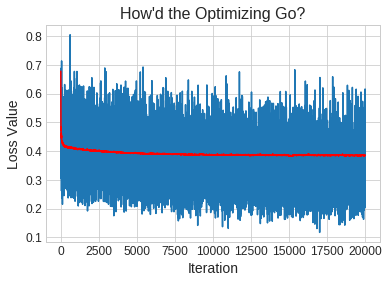

In [33]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 40)
        self.fc2 = torch.nn.Linear(40, 40)
        self.fc3 = torch.nn.Linear(40, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

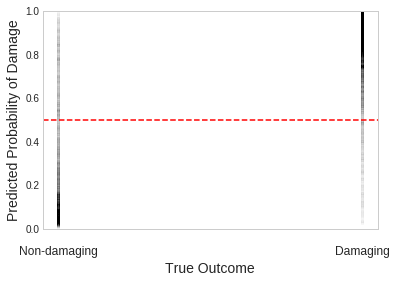

In [34]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [35]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8548533413970366


'Cross-validation set accuracy is: 0.8331065759637188'

[[ 906  468]
 [ 268 2768]]


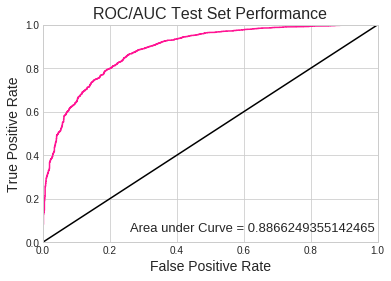

In [36]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 5. Two hidden layers, 50 neurons each

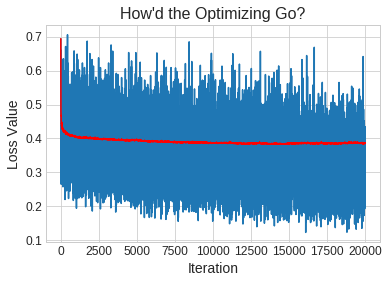

In [37]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 50)
        self.fc2 = torch.nn.Linear(50, 50)
        self.fc3 = torch.nn.Linear(50, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

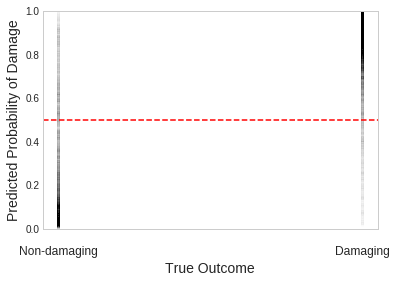

In [38]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [39]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8624130631992742


'Cross-validation set accuracy is: 0.8324263038548753'

[[ 919  455]
 [ 284 2752]]


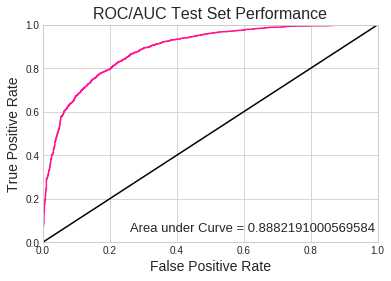

In [40]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 6. Two hidden layers, 60 neurons each

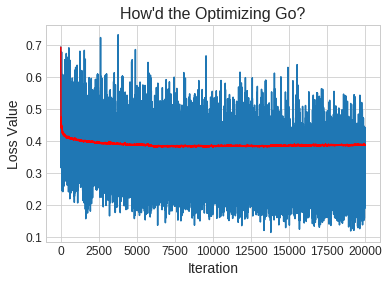

In [41]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 60)
        self.fc2 = torch.nn.Linear(60, 60)
        self.fc3 = torch.nn.Linear(60, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

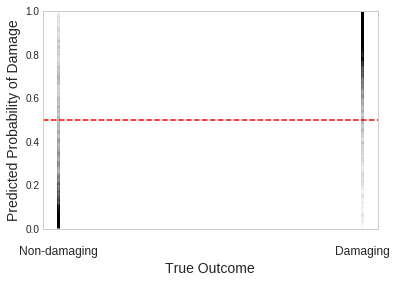

In [42]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [43]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8763985485334139


'Cross-validation set accuracy is: 0.8319727891156462'

[[ 939  435]
 [ 306 2730]]


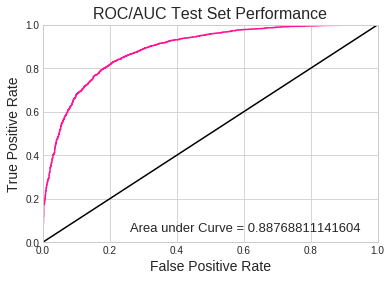

In [44]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 7. Two hidden layers, 70 neurons each

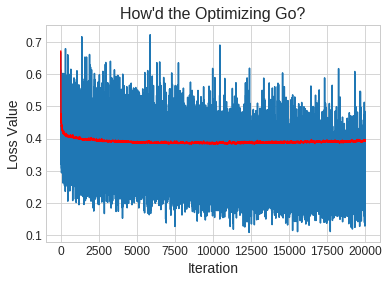

In [45]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 70)
        self.fc2 = torch.nn.Linear(70, 70)
        self.fc3 = torch.nn.Linear(70, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

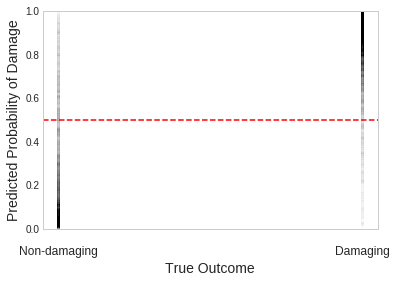

In [46]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [47]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8796492289083762


'Cross-validation set accuracy is: 0.8312925170068027'

[[ 910  464]
 [ 280 2756]]


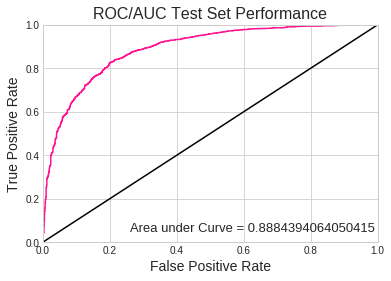

In [48]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 8. Two hidden layers, 80 neurons each

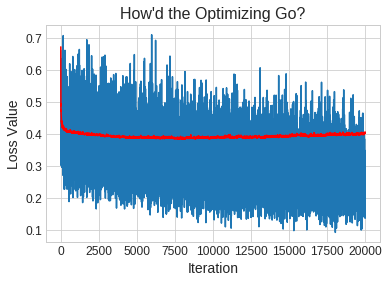

In [49]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 80)
        self.fc2 = torch.nn.Linear(80, 80)
        self.fc3 = torch.nn.Linear(80, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

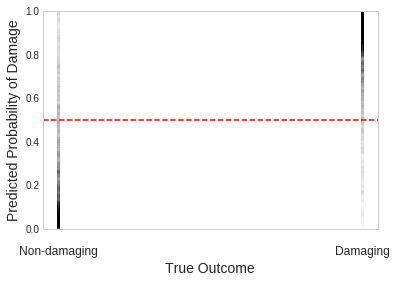

In [50]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [51]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8893256728152404


'Cross-validation set accuracy is: 0.8297052154195012'

[[ 915  459]
 [ 292 2744]]


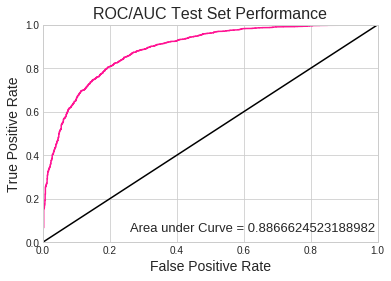

In [52]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 9. Two hidden layers, 90 neurons each

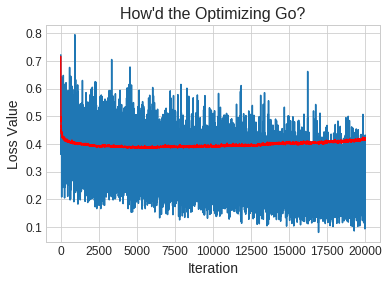

In [53]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 90)
        self.fc2 = torch.nn.Linear(90, 90)
        self.fc3 = torch.nn.Linear(90, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

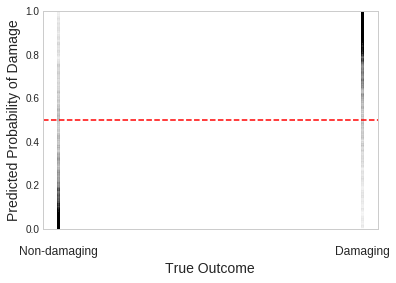

In [54]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [55]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.8964318113093438


'Cross-validation set accuracy is: 0.8260770975056689'

[[ 952  422]
 [ 345 2691]]


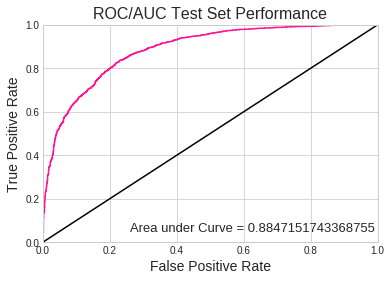

In [56]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);

## 10. Two hidden layers, 100 neurons each

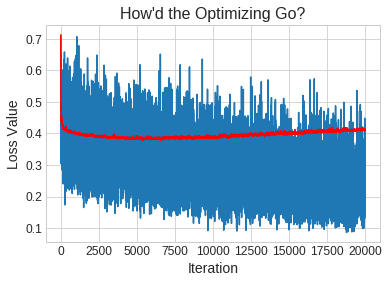

In [57]:
# Define the neural network
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(number_input, 100)
        self.fc2 = torch.nn.Linear(100, 100)
        self.fc3 = torch.nn.Linear(100, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return(x)


# Make it
model = Net()

train_neural_net(model, outcome_Tensor_binary, predictors_Tensor,
                 cv_outcome_Tensor_binary, cv_predictors_Tensor)

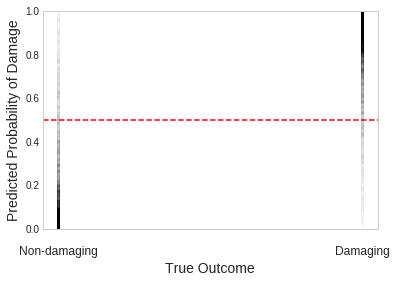

In [58]:
plot_perf(predictors_Tensor, outcome_Tensor, model, 0.0025)

In [59]:
# Get predicted probabilities as binary values
classifier_pred = np.round(model(Variable(predictors_Tensor, requires_grad = False)).data.numpy())

# Determine if those predictions are right
number_correct_preds = (classifier_pred == outcome_Tensor_binary.numpy())

# Get the accuracy of those predictions
train_accuracy = (sum(number_correct_preds) / len(number_correct_preds))[0]


# Lets get it in words
print('Training set accuracy is: ' + str(train_accuracy))

cv_classifier_pred = np.round(model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

number_correct_cv_preds = (cv_classifier_pred == cv_outcome_Tensor_binary.numpy())

cv_accuracy = (sum(number_correct_cv_preds) / len(number_correct_cv_preds))[0]


'Cross-validation set accuracy is: ' + str(cv_accuracy)

Training set accuracy is: 0.9061838524342304


'Cross-validation set accuracy is: 0.8333333333333334'

[[ 964  410]
 [ 325 2711]]


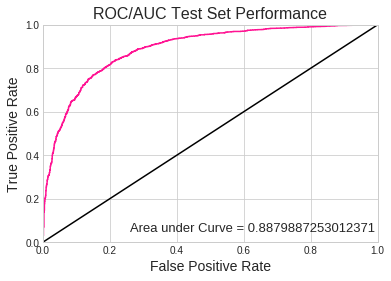

In [60]:
print(confusion_matrix(cv_outcome_Tensor_binary.numpy(), cv_classifier_pred))

# Get the false positive and true positive rates using scikit-learn
fpr_a, tpr_a, _ = roc_curve(y_true = cv_outcome_Tensor_binary.numpy(),
                            y_score = model(Variable(cv_predictors_Tensor, requires_grad = False)).data.numpy())

# Calculate the area under the curve
area_under = auc(x = fpr_a,
                 y = tpr_a)


# Plot it all
plt.plot(fpr_a, tpr_a, 'deeppink')
plt.plot(fpr_a, fpr_a, 'black')
plt.xlabel('False Positive Rate', size = 14)
plt.ylabel('True Positive Rate', size = 14)
plt.title('ROC/AUC Test Set Performance', size = 16)
plt.text(0.26, 0.05, 'Area under Curve = %s'%(area_under), size = 13)
axes = plt.gca()
axes.set_xlim([0, 1])
axes.set_ylim([0, 1]);